In [7]:
import pandas as pd
import geopandas as gpd

In [3]:
fp= "/home/bernard/Documents/Data/Choropleth/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
map_df.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...

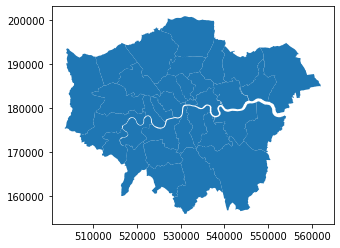

In [5]:
%matplotlib inline
map_df.plot()

In [10]:
df = pd.read_csv("/home/bernard/Documents/Data/Choropleth/london-borough-profiles.csv", encoding='cp1252', header=0) ## encoding !!
df.head()

Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   
2  E09000003                Barnet        Outer London   
3  E09000004                Bexley        Outer London   
4  E09000005                 Brent        Outer London   

   GLA_Population_Estimate_2017 GLA_Household_Estimate_2017  \
0                          8800                        5326   
1                        209000                       78188   
2                        389600                      151423   
3                        244300                       97736   
4                        332100                      121048   

  Inland_Area_(Hectares) Population_density_(per_hectare)_2017  \
0                    290                                  30.3   
1                  3,611                                  57.9   
2                  8,675                                  44.9   
3                  6,058                                  40.3   
4                  4,323                                  76.8   

   Average_Age,_2017  Proportion_of_population_aged_0-15,_2015  \
0               43.2                                      11.4   
1               32.9                                      27.2   
2               37.3                                      21.1   
3               39.0                                      20.6   
4               35.6                                      20.9   

   Proportion_of_population_of_working-age,_2015  ...  \
0                                           73.1  ...   
1                                           63.1  ...   
2                                           64.9  ...   
3                                           62.9  ...   
4                                           67.8  ...   

   Happiness_score_2011-14_(out_of_10) Anxiety_score_2011-14_(out_of_10)  \
0                                  6.0                               5.6   
1                                  7.1                               3.1   
2                                  7.4                               2.8   
3                                  7.2                               3.3   
4                                  7.2                               2.9   

  Childhood_Obesity_Prevalance_(%)_2015/16 People_aged_17+_with_diabetes_(%)  \
0                                      NaN                               2.6   
1                                     28.5                               7.3   
2                                     20.7                               6.0   
3                                     22.7                               6.9   
4                                     24.3                               7.9   

  Mortality_rate_from_causes_considered_preventable_2012/14  \
0                                                129          
1                                                228          
2                                                134          
3                                                164          
4                                                169          

  Political_control_in_council  \
0                            .   
1                          Lab   
2                         Cons   
3                         Cons   
4                          Lab   

  Proportion_of_seats_won_by_Conservatives_in_2014_election  \
0                                                  .          
1                                                  0          
2                                               50.8          
3                                               71.4          
4                                                9.5          

  Proportion_of_seats_won_by_Labour_in_2014_election  \
0                                                  .   
1                                                100   
2                                                  .   
3                 

In [18]:
df = df[['Area_name','Life_satisfaction_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)','Mortality_rate_from_causes_considered_preventable_2012/14','Population_density_(per_hectare)_2017']]
data_for_map = df.rename(index=str, columns={'Life_satisfaction_score_2011-14_(out_of_10)': "satisfaction","Anxiety_score_2011–14_(out_of_10)": "anxiety","Population_density_(per_hectare)_2017": "pop_density_per_hectare","Mortality_rate_from_causes_considered_preventable_2012/14": "mortality"})


data_for_map.head()

Area_name  satisfaction  Anxiety_score_2011-14_(out_of_10)  \
0        City of London           6.6                                5.6   
1  Barking and Dagenham           7.1                                3.1   
2                Barnet           7.5                                2.8   
3                Bexley           7.4                                3.3   
4                 Brent           7.3                                2.9   

  mortality pop_density_per_hectare  
0       129                    30.3  
1       228                    57.9  
2       134                    44.9  
3       164                    40.3  
4       169                    76.8

In [19]:
merged = map_df.set_index('NAME').join(data_for_map.set_index('Area_name'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
NAME                                                                        
Kingston upon Thames  E09000021   3726.117       0.000         F     None   
Croydon               E09000008   8649.441       0.000         F     None   
Bromley               E09000006  15013.487       0.000         F     None   
Hounslow              E09000018   5658.541      60.755         F     None   
Ealing                E09000009   5554.428       0.000         F     None   

                     SUB_2006  \
NAME                            
Kingston upon Thames     None   
Croydon                  None   
Bromley                  None   
Hounslow                 None   
Ealing                   None   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      satisfaction  Anxiety_score_2011-14_(out_of_10)  \
NAME                                                                    
Kingston upon Thames           7.3                                3.3   
Croydon                        7.1                                3.3   
Bromley                        7.5                                3.3   
Hounslow                       7.3                                3.4   
Ealing                         7.3                                3.6   

                     mortality pop_density_per_hectare  
NAME                                                    
Kingston upon Thames       141                    47.1  
Croydon                    178                    44.7  
Bromley                    148                    21.8  
Hounslow                   166                      49  
Ealing                     164                    63.3

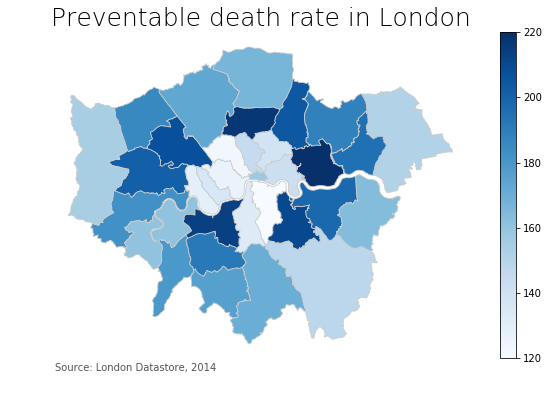

In [42]:
import matplotlib.pyplot as plt
variable = 'pop_density_per_hectare'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Preventable death rate in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
#fig.savefig('testmap.png', dpi=300)b

Données de l'[Open Data de Paris](https://parisdata.opendatasoft.com/explore/dataset/elections-europeennes-2019/export/?disjunctive.id_bvote&disjunctive.num_circ&disjunctive.num_quartier&disjunctive.num_arrond&basemap=jawg.transports&location=12,48.8589,2.33346)

In [45]:
fp_Paris= "/home/bernard/Documents/Data/Choropleth/Elections_europ_2019_paris/elections-europeennes-2019.shp"
map_df_Paris = gpd.read_file(fp_Paris)
map_df_Paris.head()

id_bvote       scrutin annee  tour        date  num_circ  num_quartie  \
0      3-2  EuropÃ©ennes  2019   1.0  2019-05-26       1.0         10.0   
1     3-14  EuropÃ©ennes  2019   1.0  2019-05-26       1.0          9.0   
2      5-5  EuropÃ©ennes  2019   1.0  2019-05-26       2.0         19.0   
3      5-8  EuropÃ©ennes  2019   1.0  2019-05-26       2.0         19.0   
4     5-23  EuropÃ©ennes  2019   1.0  2019-05-26       2.0         17.0   

   num_arrond  num_bureau  nb_procu  ...  dieumegard_  chalencon_c  \
0         3.0         2.0      52.0  ...          0.0          0.0   
1         3.0        14.0      67.0  ...          0.0          0.0   
2         5.0         5.0      59.0  ...          0.0          0.0   
3         5.0         8.0      75.0  ...          1.0          0.0   
4         5.0        23.0      55.0  ...          1.0          0.0   

   lalanne_fra  bellamy_fra  jadot_yanni  thouy_helen  bidou_olivi  \
0          0.0         42.0        228.0          7.0          2.0   
1          1.0         60.0        220.0         12.0          2.0   
2          1.0         87.0        196.0          9.0          0.0   
3          0.0        131.0        204.0         11.0          1.0   
4          1.0        133.0        182.0          6.0          1.0   

   person_chri  azergui_naj                                           geometry  
0          1.0          0.0  POLYGON ((2.36381 48.86746, 2.36419 48.86723, ...  
1          1.0          0.0  POLYGON ((2.35894 48.86842, 2.36323 48.86781, ...  
2          1.0          0.0  POLYGON ((2.34514 48.84516, 2.34559 48.84503, ...  
3          0.0          0.0  POLYGON ((2.34089 48.84728, 2.34188 48.84707, ...  
4          0.0          0.0  POLYGON ((2.34988 48.85202, 2.35024 48.85191, ...  

[5 rows x 51 columns]

In [55]:
df_Paris = pd.read_excel("/home/bernard/Documents/Data/Choropleth/Elections_europ_2019_paris/elections-europeennes-2019-E.xlsx") #problèmes avec CSV et XLS !!
df_Paris.head()

ID_BVOTE       SCRUTIN  ANNEE  TOUR        DATE  NUM_CIRC  NUM_QUARTIER  \
0      3-2  EuropÃ©ennes   2019     1  2019-05-26         1            10   
1     3-14  EuropÃ©ennes   2019     1  2019-05-26         1             9   
2      5-5  EuropÃ©ennes   2019     1  2019-05-26         2            19   
3      5-8  EuropÃ©ennes   2019     1  2019-05-26         2            19   
4     5-23  EuropÃ©ennes   2019     1  2019-05-26         2            17   

   NUM_ARROND  NUM_ BUREAU  NB_PROCU  ...  CHALENÃON Christophe  \
0           3            2        52  ...                      0   
1           3           14        67  ...                      0   
2           5            5        59  ...                      0   
3           5            8        75  ...                      0   
4           5           23        55  ...                      0   

   LALANNE Francis  BELLAMY FranÃ§ois-Xavier  JADOT Yannick  THOUY HÃ©lÃšne  \
0                0                        42            228               7   
1                1                        60            220              12   
2                1                        87            196               9   
3                0                       131            204              11   
4                1                       133            182               6   

   BIDOU Olivier  PERSON Christian Luc  AZERGUI Najib  \
0              2                     1              0   
1              2                     1              0   
2              0                     1              0   
3              1                     0              0   
4              1                     0              0   

                                           geo_shape  \
0  {"type": "Polygon", "coordinates": [[[2.363814...   
1  {"type": "Polygon", "coordinates": [[[2.358937...   
2  {"type": "Polygon", "coordinates": [[[2.345140...   
3  {"type": "Polygon", "coordinates": [[[2.340885...   
4  {"type": "Polygon", "coordinates": [[[2.349875...   

                  geo_point_2d  
0  48.8656609207,2.36294533651  
1   48.867062315,2.36055710821  
2  48.8433471188,2.34796361323  
3  48.8451500968,2.34104614253  
4  48.8500264847,2.35018337523  

[5 rows x 52 columns]

In [56]:
merged_Paris = map_df_Paris.set_index('id_bvote').join(df_Paris.set_index('ID_BVOTE'))
merged_Paris.head()

scrutin annee  tour        date  num_circ  num_quartie  \
id_bvote                                                                
3-2       EuropÃ©ennes  2019   1.0  2019-05-26       1.0         10.0   
3-14      EuropÃ©ennes  2019   1.0  2019-05-26       1.0          9.0   
5-5       EuropÃ©ennes  2019   1.0  2019-05-26       2.0         19.0   
5-8       EuropÃ©ennes  2019   1.0  2019-05-26       2.0         19.0   
5-23      EuropÃ©ennes  2019   1.0  2019-05-26       2.0         17.0   

          num_arrond  num_bureau  nb_procu  nb_inscr  ...  \
id_bvote                                              ...   
3-2              3.0         2.0      52.0    1507.0  ...   
3-14             3.0        14.0      67.0    1589.0  ...   
5-5              5.0         5.0      59.0    1535.0  ...   
5-8              5.0         8.0      75.0    1616.0  ...   
5-23             5.0        23.0      55.0    1430.0  ...   

          CHALENÃON Christophe  LALANNE Francis  BELLAMY FranÃ§ois-Xavier  \
id_bvote                                                                     
3-2                           0                0                        42   
3-14                          0                1                        60   
5-5                           0                1                        87   
5-8                           0                0                       131   
5-23                          0                1                       133   

          JADOT Yannick  THOUY HÃ©lÃšne  BIDOU Olivier  PERSON Christian Luc  \
id_bvote                                                                       
3-2                 228               7              2                     1   
3-14                220              12              2                     1   
5-5                 196               9              0                     1   
5-8                 204              11              1                     0   
5-23                182               6              1                     0   

          AZERGUI Najib                                          geo_shape  \
id_bvote                                                                     
3-2                   0  {"type": "Polygon", "coordinates": [[[2.363814...   
3-14                  0  {"type": "Polygon", "coordinates": [[[2.358937...   
5-5                   0  {"type": "Polygon", "coordinates": [[[2.345140...   
5-8                   0  {"type": "Polygon", "coordinates": [[[2.340885...   
5-23                  0  {"type": "Polygon", "coordinates": [[[2.349875...   

                         geo_point_2d  
id_bvote                               
3-2       48.8656609207,2.36294533651  
3-14       48.867062315,2.36055710821  
5-5       48.8433471188,2.34796361323  
5-8       48.8451500968,2.34104614253  
5-23      48.8500264847,2.35018337523  

[5 rows x 101 columns]

In [58]:
df_Paris.columns

Index(['ID_BVOTE', 'SCRUTIN', 'ANNEE', 'TOUR', 'DATE', 'NUM_CIRC',
       'NUM_QUARTIER', 'NUM_ARROND', 'NUM_ BUREAU', 'NB_PROCU', 'NB_INSCR',
       'NB_EMARG', 'NB_VOTANT', 'NB_BL', 'NB_NUL', 'NB_EXPRIM', 'AUBRY Manon',
       'DE PREVOISIN Robert', 'CAMUS Renaud', 'MARIE Florie',
       'LOISEAU Nathalie', 'TRAORÃ Hamada', 'PHILIPPOT Florian',
       'ALEXANDRE Audric', 'BOURG Dominique', 'VAUCLIN Vincent',
       'LAGARDE Jean-Christophe', 'GLUCKSMANN RaphaÃ«l', 'GERNIGON Yves',
       'HELGEN Gilles', 'DUPONT-AIGNAN Nicolas', 'CAILLAUD Sophie',
       'DELFEL ThÃ©rÃšse', 'ARTHAUD Nathalie', 'BROSSAT Ian',
       'ASSELINEAU FranÃ§ois', 'HAMON BenoÃ®t', 'TOMASINI Nathalie',
       'BARDELLA Jordan', 'CORBET Cathy Denise Ginette', 'SANCHEZ Antonio',
       'DIEUMEGARD Pierre', 'CHALENÃON Christophe', 'LALANNE Francis',
       'BELLAMY FranÃ§ois-Xavier', 'JADOT Yannick', 'THOUY HÃ©lÃšne',
       'BIDOU Olivier', 'PERSON Christian Luc', 'AZERGUI Najib', 'geo_shape',
       'geo_poin

In [65]:
merged_Paris['blancs_pc_expr']=merged_Paris['NB_BL']*100/merged_Paris['NB_EXPRIM']
merged_Paris['abst']=100-merged_Paris['NB_EXPRIM']*100/merged_Paris['NB_INSCR']

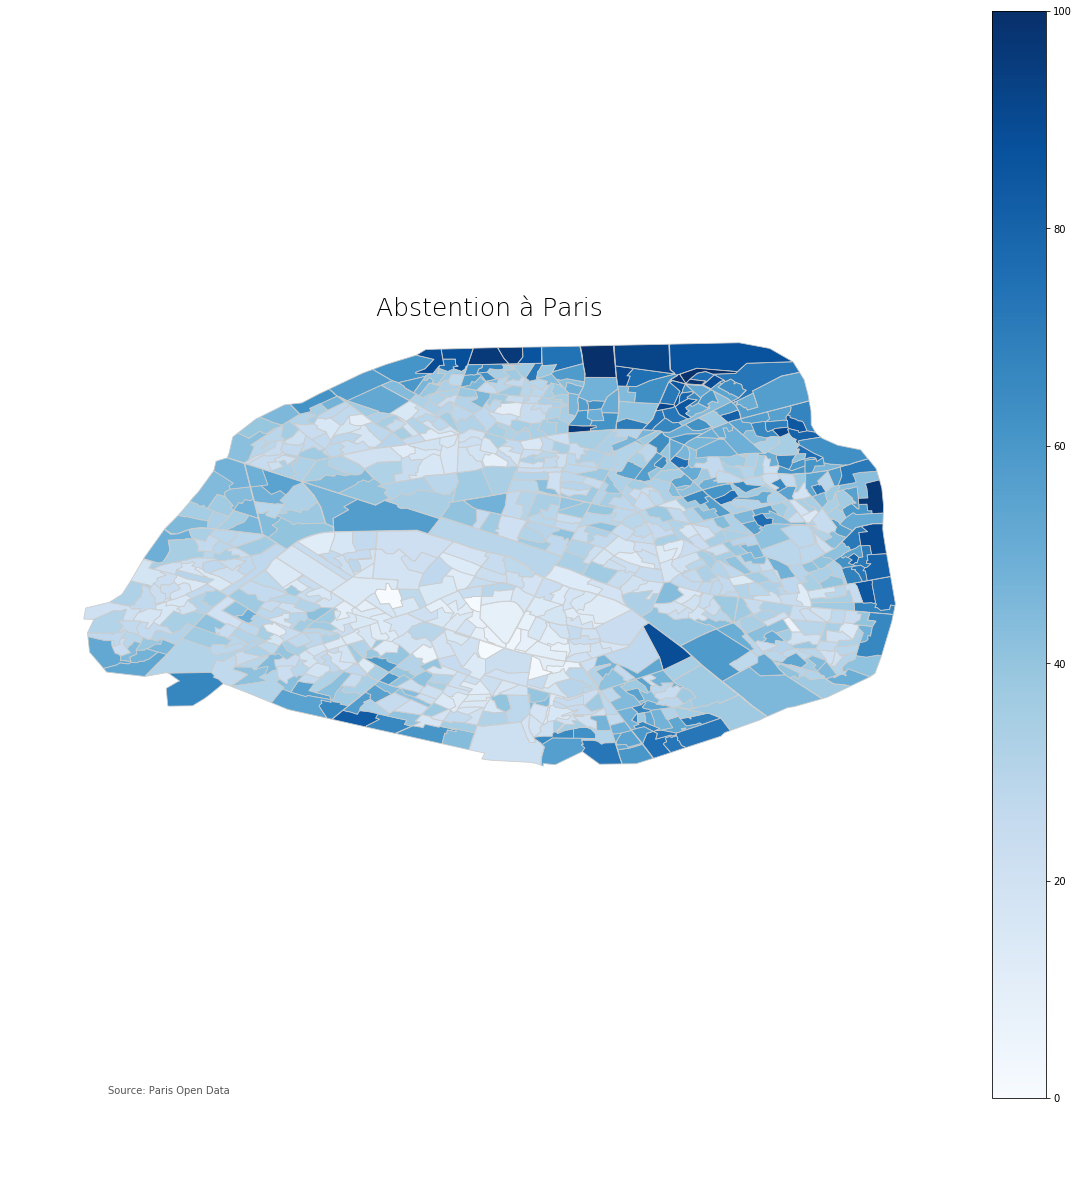

In [68]:
variable = 'abst'

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 20))

# create map
merged_Paris.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Abstention à Paris', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Paris Open Data',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
